In [52]:
import numpy as np

In [53]:
# zeta is profit
A = -3/2
c = 3
n_players = 2

eq_price = -c/(2*A)

def profit_func(x):
    theo_profit = A * np.power(x, 2) + c*x
    if theo_profit > 0:
        return theo_profit
    else:
        return 0

prices = np.linspace(0.0, 2.1, num=200)

In [54]:
def belief_func(x, belief_slope = 0.5, max_belief_constant = 1.0):
    theo_belief = max_belief_constant - belief_slope * x
    if theo_belief < 0:
        return 0
    else:
        return theo_belief

In [55]:
profits = [profit_func(x) for x in prices]
nash_profits = [profit_func(x) / n_players for x in prices]
player_belief = [belief_func(x) for x in prices]

In [56]:
equilibrium_beliefs = [belief_func(eq_price) ] * n_players
equilibrium_beliefs

equilibrium_prices = [eq_price] * n_players

In [57]:
equilibrium_beliefs = [belief_func(eq_price) ] * n_players


In [58]:
def softmax_winrate(x):
    belief = belief_func(x)
    return np.exp(belief) / (np.exp(belief) + np.sum([np.exp(y) for y in equilibrium_beliefs[:-1]]))

In [59]:
profit_nash_dev = [softmax_winrate(y) * profit_func(y) for y in prices ]

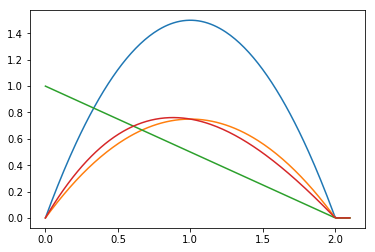

In [60]:
import matplotlib.pyplot as plt

plt.plot(prices, profits)
plt.plot(prices, nash_profits)
plt.plot(prices, player_belief)
plt.plot(prices, profit_nash_dev)

plt.show()

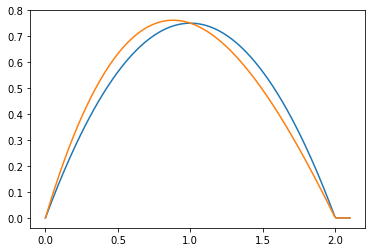

In [61]:
import matplotlib.pyplot as plt

plt.plot(prices, nash_profits)
plt.plot(prices, profit_nash_dev)

plt.show()

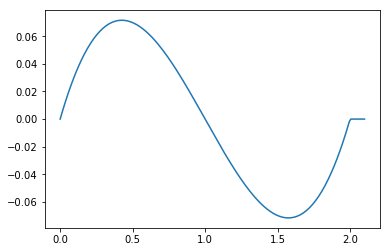

In [62]:

plt.plot(prices, [x - y for x, y in zip(profit_nash_dev, nash_profits)])
